# statistical measurment uncertainty of the pendulum period

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.interpolate import approximate_taylor_polynomial
from scipy.optimize import curve_fit


In [2]:
from Calculation.statistical_measurments import Statistics

In [3]:
pendulum_file = Path("/Users/huyenanh/git_repos/MB14_Classical_mechanics/Pendulum/F3_Fadenpendel.xlsx")

# small angle approximation

how to set phi, so that the pendulum is in the small angle approximation? <br>

&ensp;&ensp;&ensp; sin(phi) ≈ phi -> max with an 1% error

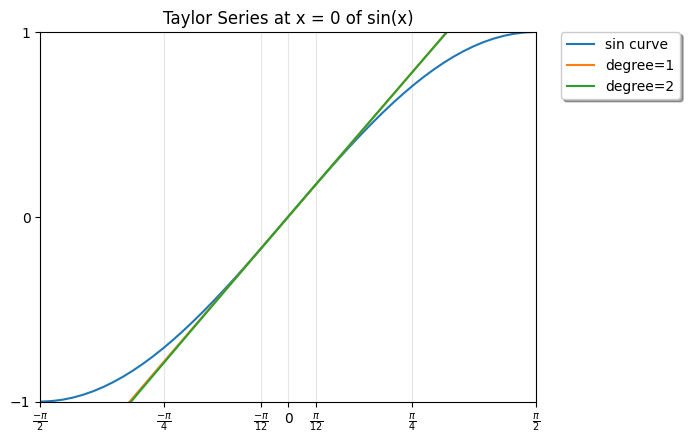

In [4]:
x = np.linspace(-np.pi, np.pi, 100) # generating 100 points between - π and π

fig, ax = plt.subplots()
ax.plot(x, np.sin(x), label="sin curve")    # plot a sin(x) curve

for degree in np.arange(1, 3, step=1):
    sin_taylor = approximate_taylor_polynomial(np.sin, 0, degree, 1,
                                               order=degree + 2)
    
    ax.plot(x, sin_taylor(x), label=f"degree={degree}") # plotting the Taylorseries to the second degree


ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           borderaxespad=0.0, shadow=True)

ax.set_yticks([-1 , 0, 1])
ax.set_xticks([(- 0.5 * np.pi) , (- 0.25 * np.pi) ,(- (1/18) * np.pi) , 0, ((1/18) * np.pi), ( 0.25 * np.pi), ( 0.5 * np.pi)])
plt.axis([- 0.5 * np.pi, 0.5 * np.pi, -1, 1])
plt.grid(axis='x', color='0.90')
labels = [r'$\frac{-\pi}{2}$',r'$\frac{-\pi}{4}$',r'$\frac{-\pi}{12}$', r"0", r'$\frac{\pi}{12}$',r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$']

# labels = [r'$-\pi/2$',r'$-\pi/4$',r'$-\pi/18$', r"0", r'$\pi/18$',r'$\pi/4$', r'$\pi/2$']
ax.set_xticklabels(labels)
ax.set_title("Taylor Series at x = 0 of sin(x)")
plt.show()

# Error estimation for task 1

Estimation of the error of the period at the equilibrium position and at the maximum angle (or turning point of the pendulum)

In [5]:
task1_df = pd.read_excel(pendulum_file, sheet_name = "Versuchsteil 1", skiprows=2)  

In [6]:
bob_position_df = task1_df.iloc[0:10].dropna(axis = 'columns')  # my data as dataframe

# The acceleration of gravitiy g 

determing g by plotting the period T against the length l of the pendulum. <br>
The period T is measured by the time of 10 oscillations (For the shortest and longest length l). <br>
The length l is measured from the point of suspension to the center of mass of the pendulum. <br>


In [48]:
task3_df = pd.read_excel(pendulum_file, sheet_name = "Versuchsteil 3", skiprows=2)  

In [49]:
# Measuring 10 Periods 10 times

ten_ten_df = task3_df.iloc[0:10].dropna(axis='columns') # deleting all the empty columns

# all time results

results_df = task3_df.iloc[25:36].dropna(axis='columns', how = 'any').reset_index().drop('index', axis=1)
results_df.columns = results_df.iloc[0] # deleting all the empty columns

In [50]:
results_df.drop(0, axis = 0).reset_index().drop('index', axis=1)

,"li,ges in m","∆li,ges in mm",Ti(mean),"∆Ti,stat (mean)","∆Ti,ges (mean)"
0,2.25,0.700001,96.42,0.102,0.202
1,2,0.001,90.8,0.101,0.201
2,1.75,0.001,80.6,0.13,0.23
3,1.5,0.001,70.5,0.14,0.24
4,1.25,0.001,60.4,0.09,0.19
5,1,0.001,50.6,0.03,0.13
6,0.75,0.001,40.3,0.08,0.18
7,0.5,0.001,30.2,0.05,0.15
8,0.25,0.001,20.3,0.03,0.13
9,0,0.500001,0,0.102,0.202


In [51]:
results_df['li,ges in m']

0     li,ges in m
1            2.25
2               2
3            1.75
4             1.5
5            1.25
6               1
7            0.75
8             0.5
9            0.25
10              0
Name: li,ges in m, dtype: object

In [57]:
# determing g

def gravity(g, l):
    """determing acceleration with this slope

    Args:
        g (int): value that we want to find
        l (int): length of the pendulum -> x-value

    Returns:
        int: returns y-Value of this function -> T^2
    """
    return ((4 * np.pi) / g) * l

y = [results_df["Ti(mean)"][i]**2 for i in range(1,len(results_df["Ti(mean)"]))]  # y-Value for slope -> T^2 squared Period

l = [results_df['li,ges in m'][i] for i in range(1,len(results_df['li,ges in m']))] # x-Value -> l : length of pendulum

popt, pcov = curve_fit(gravity, l, y)   # -> popt value for g (Slope) and pcov ist the estimated approximate covariance of popt


/var/folders/2q/qj12d6zd1qg4x5blqbp5z8fc0000gn/T/ipykernel_4798/3465216508.py:13: RuntimeWarning: divide by zero encountered in divide
  return ((4 * np.pi) / g) * l
/Users/huyenanh/git_repos/MB14_Classical_mechanics/env/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Text(0, 0.5, '$T^{2}$ in $s^{2}$')

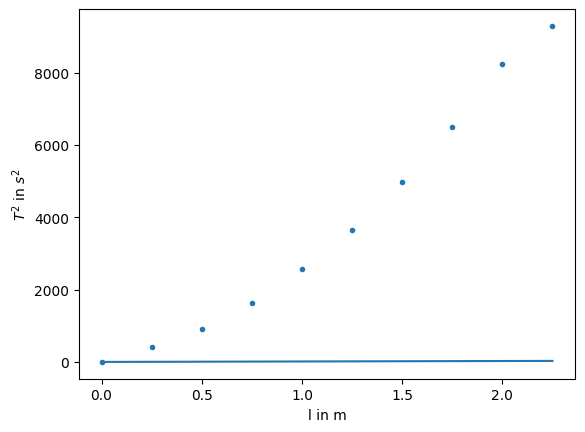

In [63]:
plt.scatter(x = l, y = y, marker = ".")
plt.plot(l, gravity(popt, l), label = 'uhm')
# plt.errorbar(l ,y, xerr= None, yerr = pcov, fmt = None)

plt.xlabel("l in m")
plt.ylabel("$T^{2}$ in $s^{2}$")